In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
%run 3.4-common.ipynb

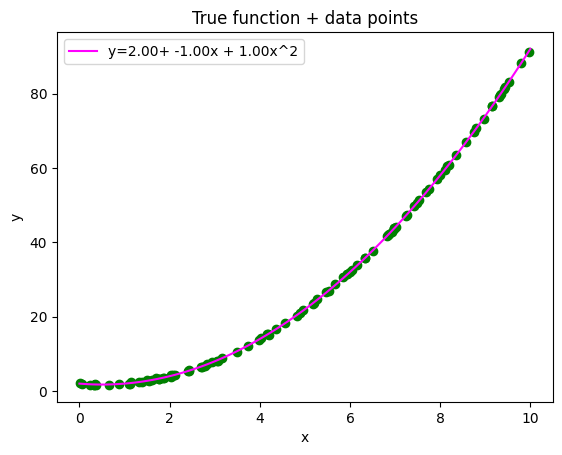

Step 0: w = tensor([0.5210]) b = tensor([0.8223]) 
MSE Error = 1327.32177734375
Gradient of w: tensor([-398.0006]) 
Gradient of b: tensor([-52.3423])
Step 100: w = tensor([7.4348]) b = tensor([-4.4308]) 
MSE Error = 74.19503784179688
Gradient of w: tensor([-0.7114]) 
Gradient of b: tensor([4.6875])
Step 200: w = tensor([7.9912]) b = tensor([-8.0973]) 
MSE Error = 60.17138671875
Gradient of w: tensor([-0.4234]) 
Gradient of b: tensor([2.7899])
Step 300: w = tensor([8.3224]) b = tensor([-10.2795]) 
MSE Error = 55.203895568847656
Gradient of w: tensor([-0.2520]) 
Gradient of b: tensor([1.6604])
Step 400: w = tensor([8.5195]) b = tensor([-11.5783]) 
MSE Error = 53.444305419921875
Gradient of w: tensor([-0.1500]) 
Gradient of b: tensor([0.9882])
Step 500: w = tensor([8.6368]) b = tensor([-12.3512]) 
MSE Error = 52.821014404296875
Gradient of w: tensor([-0.0893]) 
Gradient of b: tensor([0.5882])
Step 600: w = tensor([8.7066]) b = tensor([-12.8113]) 
MSE Error = 52.60023498535156
Gradient of 

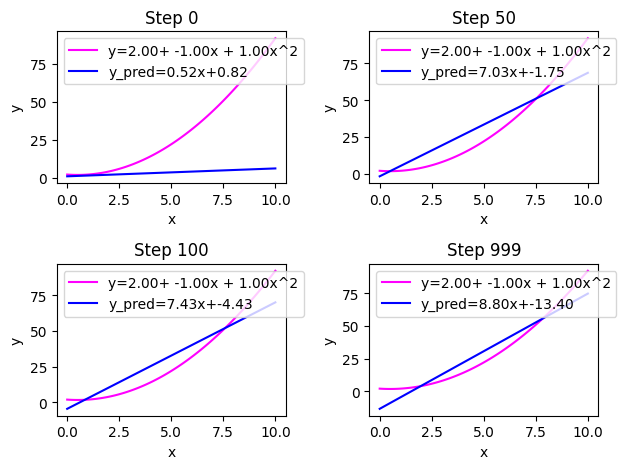

True function: y=x^2 -x + 2
Learnt function: y_pred = 8.796333312988281*x + -13.40276050567627
Clearly the model is not converging to anything
close to the desired/true function.
Our model architecture is inadequate


In [3]:
# This programming exercise is similar to the last
# one in that we will fit a model to a set of
# observations from a known function with small added
# noise.
# However, here, that known function is non-linear.
#
# Here the input data is generated from non-linear
# function y = x^2 -x + 2.
# As before, our observations (training data) comprise
# various values of x and corresponding values of y
# computed from this function.
# We will add some noise to the computed values to
# generate the observed value.
#
# We will train a model y_obs = w_0*x^2 + w_1*x + b
# and see if the learnt parameters come out close to
# the expected values w_0 = 1, w_1 = -1 b = 2.


torch.manual_seed(0)
N = 100

# Generate random x values
x = 10 * torch.rand(N, 1)

# Compute true function outputs 
y = x**2 - x + 2.0

# Add some random noise to get observed values of y
y_obs = y + (0.5 * torch.rand(N, 1) - 0.25)

# Plot the true function and the data points.
# True y values (magenta) will fall on a parabola.
# The noise-added observed values (green points)
#  will fall around that parabola.
plt.scatter(x.data, y_obs.data, color="green")
draw_parabola(2, -1, 1)
plt.title('True function + data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

# First, let us try a
# linear model y_pred = wx + b
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

params = [b, w]
num_steps = 1000
learning_rate = 1e-2

plt.figure()
i = 1
plot_steps = [0, 50, 100, 999]

# Train model iteratively
for step in range(num_steps):
    # linear model
    y_pred = params[0] + params[1] * x
    
    # Periodically plot the true function and
    # current approximation to check how we are doing    
    if step in plot_steps:
        draw_subplot(i, step, draw_parabola, 
                     {"w0": 2, "w1": -1, "w2": 1},
                    draw_line,
                    {"m": params[1].data.numpy()[0],
                     "c": params[0].data.numpy()[0],
                     "color":"blue",
                     "label": "y_pred=%0.2fx+%0.2f"\
                                %(params[1].data.numpy()[0],
                                  params[0].data.numpy()[0])} 
                    )
        i+=1
        
    # Compute Mean Squared Error (M.S.E)
    # i.e (y_pred - y_obs)^2
    mean_squared_error = torch.mean((y_pred
                                     - y_obs) ** 2)
    
    # Back propogate. Computes the partial derivative
    # of error with respect to each variable and stores it
    # within the grad field of the variable.
    mean_squared_error.backward()
    
    # Print some diagnostic values every 100th iteration
    if step % 100 == 0:
        print("Step {}: w = {} b = {} \nMSE Error = {}"\
              .format(step, params[1].data,
                      params[0].data,
                      mean_squared_error))
        print("Gradient of w: {} \nGradient of b: {}"\
              .format(params[1].grad, params[0].grad))
        
    # Crucial step, adjust the parameters (weights and bias)
    # using the gradients (partial derivatives) computed during
    # the call to backward() above        
    update_parameters(params, learning_rate)
    
plt.tight_layout()
plt.show()

print("True function: y=x^2 -x + 2")
print("Learnt function: y_pred = {}*x + {}"\
      .format(params[1].data.numpy()[0],
              params[0].data.numpy()[0]))
print("Clearly the model is not converging to anything\n"
      "close to the desired/true function.\n"
      "Our model architecture is inadequate")

Step 0:
w0 = tensor([1.4875]) w1 = tensor([-0.2230]) w2 = tensor([-1.0057])
MSE Error = 7090.93505859375
Gradient of w0: tensor([-123.5347]) 
Gradient of w1: tensor([-927.7972])
Gradient of w1: tensor([-7398.9434])
Step 20000:
w0 = tensor([1.4473]) w1 = tensor([-0.7683]) w2 = tensor([0.9801])
MSE Error = 0.044630616903305054
Gradient of w0: tensor([-0.0930]) 
Gradient of w1: tensor([0.0411])
Gradient of w1: tensor([-0.0038])
Step 40000:
w0 = tensor([1.6002]) w1 = tensor([-0.8353]) w2 = tensor([0.9859])
MSE Error = 0.030484532937407494
Gradient of w0: tensor([-0.0619]) 
Gradient of w1: tensor([0.0271])
Gradient of w1: tensor([-0.0023])
Step 60000:
w0 = tensor([1.7020]) w1 = tensor([-0.8798]) w2 = tensor([0.9898])
MSE Error = 0.024226026609539986
Gradient of w0: tensor([-0.0412]) 
Gradient of w1: tensor([0.0181])
Gradient of w1: tensor([-0.0015])
Step 80000:
w0 = tensor([1.7696]) w1 = tensor([-0.9094]) w2 = tensor([0.9924])
MSE Error = 0.021457994356751442
Gradient of w0: tensor([-0.0274

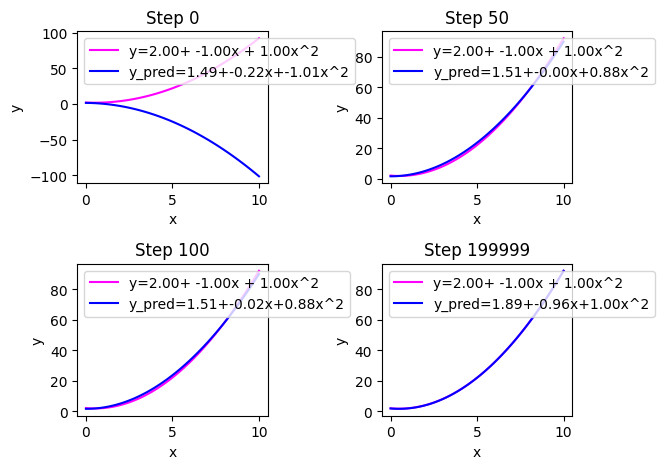

True function: y= 2 - x + x^2
Learnt function: y_pred = 1.8918471336364746 + -0.9629372358322144*x + 0.9970840215682983*x^2
Model has more or less converged to true underlying function


In [4]:
# Try quadratic model architecture:
# y_pred = w0 + w1*x + w2*x^2
w0 = torch.randn(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
params = [w0, w1, w2]

plt.figure()
i = 1

# Train model iteratively
# Run with very low learning rate
# to prevent exploding gradients
learning_rate = 1e-4
num_steps = 200000
plot_steps = [0, 50, 100, 199999]
for step in range(num_steps):
    # quadratic model architecture:
    # y_pred = w0 + w1*x + w2*x^2
    y_pred = params[0] + params[1] * x + params[2] * (x**2)

    # Periodically plot the true function and
    # current approximation to check how we are doing 
    if step in plot_steps:
        draw_subplot(i, step, draw_parabola, 
                     {"w0": 2, "w1": -1, "w2": 1},
                    draw_parabola,
                    {"w0": params[0].data.numpy()[0],
                     "w1": params[1].data.numpy()[0],
                     "w2": params[2].data.numpy()[0],
                     "color":"blue",
                     "label":"y_pred=%0.2f+%0.2fx+%0.2fx^2"
                           %(params[0].data.numpy()[0], 
                             params[1].data.numpy()[0],
                             params[2].data.numpy()[0])} 
                    )
        i+=1
        
    # Mean Squared Error (M.S.E)
    # i.e (y_pred - y_obs)^2
    mean_squared_error = torch.mean((y_pred -
                                     y_obs) ** 2)
    
    # Back propogate. Computes the partial derivative
    # of error with respect to each variable and stores it
    # within the grad field of the variable.
    mean_squared_error.backward()
    if step % 20000 == 0:
        print("Step {}:\nw0 = {} w1 = {} w2 = {}\n"
              "MSE Error = {}"\
              .format(step, params[0].data, params[1].data,
                      params[2].data, mean_squared_error))
        print("Gradient of w0: {} \nGradient of w1: {}\n"
              "Gradient of w1: {}"\
              .format(params[0].grad, params[1].grad,
                      params[2].grad))
    
    # Crucial step, adjust the parameters (weights and bias)
    # using the gradients (partial derivatives) computed during
    # the call to backward() above 
    update_parameters(params, learning_rate)
    
plt.tight_layout()
plt.show()

print("True function: y= 2 - x + x^2")
print("Learnt function: y_pred = {} + {}*x + {}*x^2"\
      .format(params[0].data.numpy()[0],
              params[1].data.numpy()[0],
              params[2].data.numpy()[0]))
print("Model has more or less converged to "
      "true underlying function")   